In [2]:
import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [3]:
import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [5]:
import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [8]:
import pandas as pd
from sklearn import tree

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X,Y)

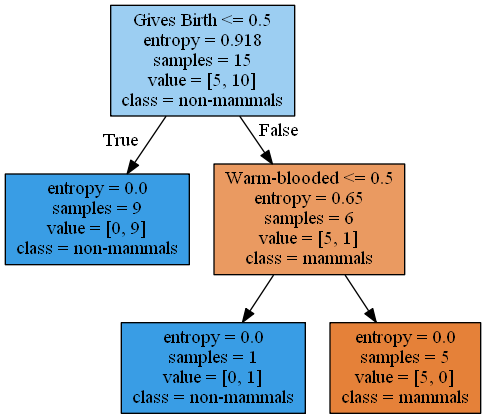

In [1]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X,Y)

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'],filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [3]:
import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData,columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [4]:
import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData,columns=data.columns)

testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')],axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score

data = pd.read_csv('6.vertebrate.csv',header = 'infer')
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData,columns=data.columns)

testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')],axis=1)

print('Accuracy on test data is %.2f' % (accuracy_score(testY,predY)))

Accuracy on test data is 0.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

